# Dimensionality/Ordering Testing Notebook

The purpose of this notebook is to test how the input ordering of variables impacts the model's performance.

We find that inputting variables in the order of their relative importance allows the model to perform better than in the reversed/random order. Interestingly, all of them end up at the same performance level (MAE) when the last variable is introduced.

However, the model needs at least 5-6 of the most useful variables to be any good.

There are slight dimensionality concerns with adding noise but only really at lower sample sizes.

We can sift out which variables are more important than others.

## imports

In [ ]:
# Set up
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, RationalQuadratic, ExpSineSquared, DotProduct, Matern, WhiteKernel
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import random
from matplotlib.cm import datad
from scipy.stats.qmc import LatinHypercube
from math import sqrt
from array import *
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import pandas as pd

url = 'https://raw.githubusercontent.com/benkim1226/footballdata/master/gpr_var_length_scales.csv'
length_scales = pd.read_csv(url, index_col = 0)
length_scales.sort_values(by='length_scale')

,length_scale
h_tile,8.320719
rho_tile,12.656570
t_final,13.559468
k_tile,13.783874
cp_tile,14.162071
M_inf,15.335859
T_inf,23.483115
rho_Ti,40.048440
emissivity,41.388831
p_inf,42.077820


## creating data

In [ ]:
def create_data(sample):
  """
  This function creates a dictionary of sample data.
  """

  d = {}

  for i in range(len(sample[0])):
    d["{0}".format(i)] = []

  keys = d.keys()

  for key in list(keys):
    for i in range(len(sample)):
      d[key] += [sample[i][int(key)]]

  return d

In [ ]:
def standardizer(df):
  '''
  This function standardizes a given df and returns a standarized copy.
  '''

  df_copy = df.copy()

  scaler = StandardScaler()
  df_copy = scaler.fit_transform(df_copy)
  df_copy = pd.DataFrame(df_copy)
  return(df_copy)

In [ ]:
LHS_url = 'https://raw.githubusercontent.com/benkim1226/footballdata/master/LHS_complete.csv'
LHS_data = pd.read_csv(LHS_url, index_col = 0)
LHS_data = LHS_data.reset_index()

In [ ]:
ordered_cols = ['h_tile','rho_tile','t_final','k_tile','cp_tile','M_inf','T_inf','rho_Ti',
                    'emissivity','p_inf','cp_Ti','h_Ti','fudge_factor','k_Ti']

In [ ]:
engine = LatinHypercube(d=1)
sample = engine.random(n=1000)
sample = create_data(sample)

pd.DataFrame(sample)

,0
0,0.272474
1,0.107115
2,0.094126
3,0.058027
4,0.038982
...,...
995,0.915947
996,0.423627
997,0.354796
998,0.888702


## Model code

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/Colab Notebooks
%run run_model.ipynb
run_model(x_input,t_final)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Colab Notebooks


342.2243670511788

## Specifying columns

In [ ]:
url = 'https://raw.githubusercontent.com/benkim1226/footballdata/master/simulated_data_1000.csv'
s = 500
data = pd.read_csv(url, index_col = 0).loc[0:s]
data = data[['h_tile','rho_tile', 't_final','k_tile', 'cp_tile', 'M_inf','T_inf', 'rho_Ti', 'emissivity',  'p_inf','cp_Ti', 'h_Ti','fudge_factor','k_Ti','simulation_values']]

cols = ['h_tile','rho_tile', 't_final','k_tile', 'cp_tile', 'M_inf','T_inf', 'rho_Ti', 'emissivity',  'p_inf','cp_Ti', 'h_Ti','fudge_factor','k_Ti','simulation_values']

ordered_cols = ['h_tile','rho_tile','t_final','k_tile','cp_tile','M_inf','T_inf','rho_Ti',
                    'emissivity','p_inf','cp_Ti','h_Ti','fudge_factor','k_Ti'] # can permute this

constant_cols = [0.0254 , 144, 60, 0.126, 628, 5.0 , 284.0, 4540, 0.8, 2736.0 , 460, 0.00015, 1.0, 7.1]

## shuffle_lists

In [ ]:
def shuffle_lists(list1, list2):
  """
  This function shuffles two lists based off the same random index.
  """

    # Get the length of the lists
    length = len(list1)

    # Create a shuffled list of indices
    indices = list(range(length))
    random.shuffle(indices)

    # Create a new list by shuffling the elements of the original lists
    new_list1 = []
    new_list2 = []
    for index in indices:
        new_list1.append(list1[index])
        new_list2.append(list2[index])

    return new_list1, new_list2

## Latin Hypercube Data

In [ ]:
LHS_url = 'https://raw.githubusercontent.com/benkim1226/footballdata/master/LHS_complete.csv'
LHS_data = pd.read_csv(LHS_url, index_col = 0)
LHS_data = LHS_data.reset_index()

LHS_data.columns = ['t_final','h_tile','h_Ti','rho_tile','rho_Ti','cp_tile','cp_Ti','k_tile','k_Ti',
                    'emissivity', 'M_inf', 'p_inf', 'T_inf', 'fudge_factor','simulation_values']

run_model_cols = ['t_final','h_tile','h_Ti','rho_tile','rho_Ti','cp_tile','cp_Ti','k_tile','k_Ti',
                        'emissivity', 'M_inf', 'p_inf', 'T_inf', 'fudge_factor']

LHS_X_data = LHS_data.drop('simulation_values', axis=1)

In [ ]:
LHS_X_data = LHS_X_data.loc[:,run_model_cols]

New_X_test  = standardizer(LHS_X_data)

indexes = random.sample(range(0, len(New_X_test)), 100)

New_X_test = New_X_test.loc[indexes]
New_y_test = LHS_data['simulation_values'].loc[indexes]

## dimension_test

In [ ]:
sample_size = 75

Avg_Train_MAE = []
Avg_New_Test_MAE = []
Avg_Test_MAE = []

runs_per_dim = 20

sample_data = pd.DataFrame(np.random.randint(0,10, size=(sample_size,0)))

def dimension_test(sample_data, New_X_test, New_y_test):
  """
  This function compares each dimension to a 14-D test set.

  Parameters:

  sample_data: blank dataframe
  New_X_test: the 14-D x-values to test on
  New_y_test: the y-values from New_X_test
  """

  from IPython.display import clear_output

  LHS_url = 'https://raw.githubusercontent.com/benkim1226/footballdata/master/LHS_complete.csv'
  LHS_data = pd.read_csv(LHS_url, index_col = 0)
  LHS_data = LHS_data.reset_index()

  LHS_data.columns = ['t_final','h_tile','h_Ti','rho_tile','rho_Ti','cp_tile','cp_Ti','k_tile','k_Ti',
                    'emissivity', 'M_inf', 'p_inf', 'T_inf', 'fudge_factor','simulation_values']

  for i in range(len(data.columns)-1):

    print("Starting Column #"+str(i))

    sample_data[new_ordered_cols[i]] = 0

    print(new_ordered_cols[i])

    print(sample_data.head())

    n_hypercube = i + 1
    print("n_hypercube = "+str(n_hypercube))

    n_constants = len(data.columns) - i - 2
    print("n_constants = "+str(n_constants))

    # CREATING NEW LATIN HYPERCUBE

    engine = LatinHypercube(d= n_hypercube)
    LHS = engine.random(n= sample_size)

    LHS = create_data(LHS)
    LHS = pd.DataFrame(LHS)

    print(LHS.head())

    a = []
    b = []

    X_data = data.drop('simulation_values',axis=1)
    X_data = X_data.loc[:,new_ordered_cols]

    for column in X_data.columns: # the problem!
      b.append(max(X_data[column]))
      a.append(min(X_data[column]))

    for i in range(len(LHS.columns)):
      LHS.iloc[:,i] = a[i] +(b[i] - a[i])*LHS.iloc[:,i]

    # ----
    # Filling in with constants
    # ----

    constant_col_names = new_ordered_cols[n_hypercube:]
    varied_col_names = new_ordered_cols[:n_hypercube]

    for i in range(n_constants):

      #constant_cols = [0.0254 , 144, 60, 0.126, 628, 5.0 , 284.0, 4540, 0.8, 2736.0 , 460, 0.00015, 1.0, 7.1]
      constant_cols = new_constant_cols[n_hypercube:]

      LHS[constant_col_names[i]] = constant_cols[i]

    LHS.columns = varied_col_names + constant_col_names

    # ----
    # Column ordering
    # ----

    print(LHS.head())

    simulation_values = []

    for row in range(len(LHS)):

      run_model_cols = LHS.columns.tolist()

      run_model_cols = ['t_final','h_tile','h_Ti','rho_tile','rho_Ti','cp_tile','cp_Ti','k_tile','k_Ti',
                        'emissivity', 'M_inf', 'p_inf', 'T_inf', 'fudge_factor']

      LHS = LHS[run_model_cols]

      values = LHS.loc[row]

      simulation_value = run_model(values[1:],values[0])
      simulation_values.append(simulation_value) # make sure t_final is [0]

      print("row "+str(row)+": T_Ti = "+str(simulation_value))

      clear_output()

    # ----
    # Training model
    # ----

    LHS['simulated_values'] = simulation_values


    X = LHS.drop('simulated_values',axis=1)
    X = standardizer(X) #!!!

    y = LHS['simulated_values']

    Train_MAE = []
    Test_MAE = []
    New_Test_MAE = []

    # --- NEW TEST ---

    for run in range(runs_per_dim):

      print("Starting Run #"+str(run))

      print("Train test splitting")

      from sklearn.model_selection import train_test_split

      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

      print("Train test splitted")


      # -----
      # GPR
      # -----

      constant = 1
      length_scale_array = np.array([1]*len(X.columns))

      kernel = constant * RBF(length_scale= length_scale_array, length_scale_bounds=(1e-3, 1e3))
      gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9, normalize_y = True)

      model = gpr

      print("Fitting model")

      model.fit(X_train, y_train)

      print("Model fitted")

      Test_MAE_obs = mean_absolute_error(y_test, model.predict(X_test)) # change X_test and Y_test
      New_Test_MAE_obs = mean_absolute_error(New_y_test, model.predict(New_X_test))
      Train_MAE_obs = mean_absolute_error(y_train, model.predict(X_train))

      Test_MAE.append(Test_MAE_obs)
      New_Test_MAE.append(New_Test_MAE_obs)
      Train_MAE.append(Train_MAE_obs)

      print("Test MAE = "+str(round(Test_MAE_obs,4))) # is the model good?
      print("New Test MAE = "+str(round(New_Test_MAE_obs,4)))

      clear_output()

    Avg_Train_MAE.append(np.mean(Train_MAE))
    #print("Train MAE = "+Avg_Train_MAE)

    Avg_Test_MAE.append(np.mean(Test_MAE))
    #print("Test MAE = "+Avg_Test_MAE)

    Avg_New_Test_MAE.append(np.mean(New_Test_MAE))

  return Avg_New_Test_MAE

## Executing function

In [ ]:
# RANDOM/SHUFFLED ORDER

new_ordered_cols, new_constant_cols = shuffle_lists(ordered_cols, constant_cols)

Avg_New_Test_MAE = []
Test_MAE_random = dimension_test(sample_data, New_X_test, New_y_test)

# CORRECT ORDER

new_ordered_cols = ordered_cols
new_constant_cols = constant_cols

Avg_New_Test_MAE = []
Test_MAE_ordered = dimension_test(sample_data, New_X_test, New_y_test)

# REVERSED ORDER

new_ordered_cols = ordered_cols[len(ordered_cols) - 1::-1] #
new_constant_cols = constant_cols[len(constant_cols) - 1::-1]

Avg_New_Test_MAE = []
Test_MAE_reversed = dimension_test(sample_data, New_X_test, New_y_test)


## Plotting each order

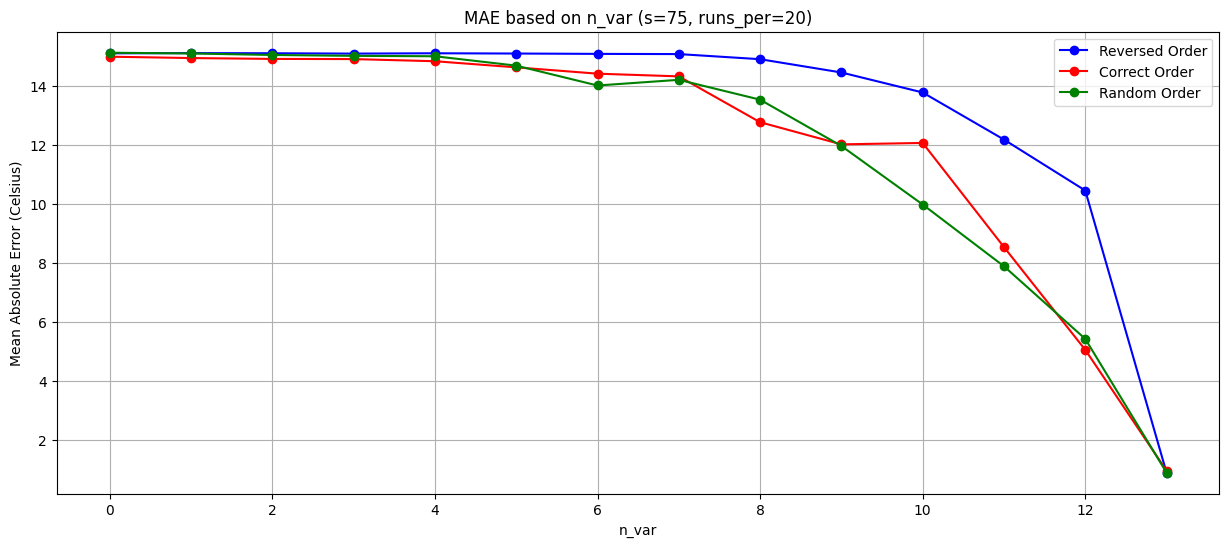

In [ ]:
# Plotting the MAE of the testng and training sets based off of sample size
n_var = range(len(new_ordered_cols))

plt.figure(figsize=(15,6))

plt.plot(n_var, Test_MAE_reversed, 'o-', color='blue', label='Reversed Order')
plt.plot(n_var, Test_MAE_ordered, 'o-', color='red', label='Correct Order')
plt.plot(n_var, Test_MAE_random, 'o-', color='green', label='Random Order')

plt.legend()
plt.grid()
plt.xlabel('n_var')
plt.ylabel('Mean Absolute Error (Celsius)')
plt.title('MAE based on n_var (s=' +str(sample_size)+', runs_per='+str(runs_per_dim)+')')
plt.show()

## Dimension to Dimension comparison*

Comparing each dimension with its testing counterpart of the same dimensionality (as to avoid extrapolating on columns of zero's)

*best graph yet

In [ ]:
sample_size = 75

Avg_Train_MAE = []
Avg_New_Test_MAE = []
Avg_Test_MAE = []

runs_per_dim = 20

sample_data = pd.DataFrame(np.random.randint(0,10, size=(sample_size,0)))

def dimension_test_2(sample_data):

  """
  This function compares each n-size dimension to an n-size test set.

  Parameters:

  sample_data: blank dataframe
  """

  from IPython.display import clear_output

  LHS_url = 'https://raw.githubusercontent.com/benkim1226/footballdata/master/LHS_complete.csv'
  LHS_data = pd.read_csv(LHS_url, index_col = 0)
  LHS_data = LHS_data.reset_index()

  LHS_data.columns = ['t_final','h_tile','h_Ti','rho_tile','rho_Ti','cp_tile','cp_Ti','k_tile','k_Ti',
                    'emissivity', 'M_inf', 'p_inf', 'T_inf', 'fudge_factor','simulation_values']

  for i in range(len(data.columns)-1):

    print("Starting Column #"+str(i))

    sample_data[new_ordered_cols[i]] = 0

    n_hypercube = i + 1
    print("n_hypercube = "+str(n_hypercube))

    n_constants = len(data.columns) - i - 2
    print("n_constants = "+str(n_constants))


    # CREATING NEW LATIN HYPERCUBE

    engine = LatinHypercube(d= n_hypercube)
    LHS = engine.random(n= sample_size)

    LHS = create_data(LHS)
    LHS = pd.DataFrame(LHS)


    a = []
    b = []

    X_data = data.drop('simulation_values',axis=1)
    X_data = X_data.loc[:, new_ordered_cols]

    for column in X_data.columns: # the problem!
      b.append(max(X_data[column]))
      a.append(min(X_data[column]))

    for col in range(len(LHS.columns)):
      LHS.iloc[:,col] = a[col] +(b[col] - a[col])*LHS.iloc[:,col]

    # ----
    # Filling in with constants
    # ----

    constant_col_names = new_ordered_cols[n_hypercube:]
    varied_col_names = new_ordered_cols[:n_hypercube]

    for constant in range(n_constants):

      #constant_cols = [0.0254 , 144, 60, 0.126, 628, 5.0 , 284.0, 4540, 0.8, 2736.0 , 460, 0.00015, 1.0, 7.1]
      constant_cols = new_constant_cols[n_hypercube:]

      LHS[constant_col_names[constant]] = constant_cols[constant]

    LHS.columns = varied_col_names + constant_col_names

    # ----
    # Column ordering
    # ----

    simulation_values = []

    for row in range(len(LHS)):

      run_model_cols = LHS.columns.tolist()

      run_model_cols = ['t_final','h_tile','h_Ti','rho_tile','rho_Ti','cp_tile','cp_Ti','k_tile','k_Ti',
                        'emissivity', 'M_inf', 'p_inf', 'T_inf', 'fudge_factor']

      LHS = LHS[run_model_cols]

      values = LHS.loc[row]

      simulation_value = run_model(values[1:],values[0])
      simulation_values.append(simulation_value) # make sure t_final is [0]

      print("row "+str(row)+": T_Ti = "+str(simulation_value))

      clear_output()

    # ----
    # Creating training data
    # ----
    LHS = LHS.loc[:,new_ordered_cols]

    LHS['simulation_values'] = simulation_values

    X = LHS.drop('simulation_values',axis=1)

    X = X.iloc[:,0:i+1] # KEY DIFFERENCE IN THIS CODE VERSION

    X = standardizer(X)
    y = LHS['simulation_values']

    Train_MAE = []
    Test_MAE = []
    New_Test_MAE = []

    # --- NEW TEST ---

    LHS_X_data = LHS_data.drop('simulation_values',axis=1)
    LHS_X_data = LHS_X_data.loc[:,new_ordered_cols]

    New_X_test = LHS_X_data.iloc[:,0:i+1] # same dim as X

    New_X_test  = standardizer(New_X_test)

    indexes = random.sample(range(0, len(New_X_test)), 100)

    New_X_test = New_X_test.loc[indexes] # this works!!!
    New_y_test = LHS_data['simulation_values'].loc[indexes]

    # --- Training model ---


    for run in range(runs_per_dim):

      print("Starting Run #"+str(run))

      print("Train test splitting")

      from sklearn.model_selection import train_test_split

      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

      print("Train test splitted")

      # -----
      # GPR
      # -----

      constant = 1
      length_scale_array = np.array([1]*len(X.columns))

      kernel = constant * RBF(length_scale= length_scale_array, length_scale_bounds=(1e-3, 1e3))+ WhiteKernel(noise_level = 100)
      gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9, normalize_y = True)

      model = gpr

      print("Fitting model")

      model.fit(X_train, y_train)

      print("Model fitted")

      Test_MAE_obs = mean_absolute_error(y_test, model.predict(X_test)) # change X_test and Y_test
      New_Test_MAE_obs = mean_absolute_error(New_y_test, model.predict(New_X_test))
      Train_MAE_obs = mean_absolute_error(y_train, model.predict(X_train))

      Test_MAE.append(Test_MAE_obs)
      New_Test_MAE.append(New_Test_MAE_obs)
      Train_MAE.append(Train_MAE_obs)

      print("Test MAE = "+str(round(Test_MAE_obs,4))) # is the model good?
      print("New Test MAE = "+str(round(New_Test_MAE_obs,4)))

      clear_output()

    Avg_Train_MAE.append(np.mean(Train_MAE))
    #print("Train MAE = "+Avg_Train_MAE)

    Avg_Test_MAE.append(np.mean(Test_MAE))
    #print("Test MAE = "+Avg_Test_MAE)

    Avg_New_Test_MAE.append(np.mean(New_Test_MAE))

  return Avg_New_Test_MAE

## Executing Function

In [ ]:
# RANDOM/SHUFFLED ORDER

new_ordered_cols, new_constant_cols = shuffle_lists(ordered_cols, constant_cols)

Avg_New_Test_MAE = []
Test_MAE_random = dimension_test_2(sample_data)

# CORRECT ORDER

new_ordered_cols = ordered_cols
new_constant_cols = constant_cols

Avg_New_Test_MAE = []
Test_MAE_ordered = dimension_test_2(sample_data)

# REVERSED ORDER

new_ordered_cols = ordered_cols[len(ordered_cols) - 1::-1] #
new_constant_cols = constant_cols[len(constant_cols) - 1::-1]

Avg_New_Test_MAE = []
Test_MAE_reversed = dimension_test_2(sample_data)


## Graphing

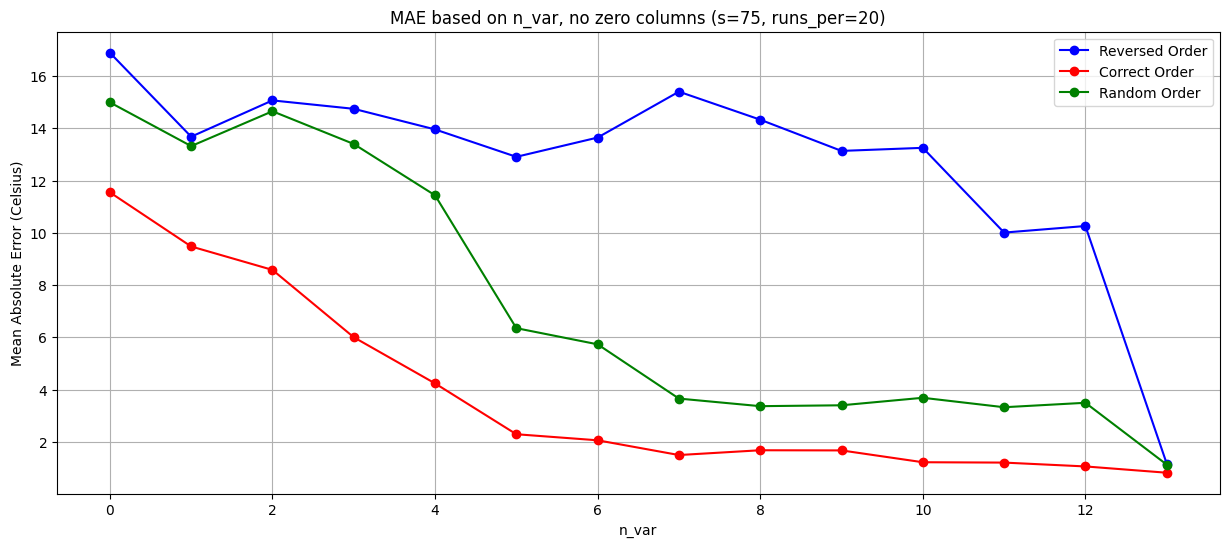

In [ ]:
# Plotting the MAE of the testng and training sets based off of sample size
n_var = range(len(new_ordered_cols))

plt.figure(figsize=(15,6))

plt.plot(n_var, Test_MAE_reversed, 'o-', color='blue', label='Reversed Order')
plt.plot(n_var, Test_MAE_ordered, 'o-', color='red', label='Correct Order')
plt.plot(n_var, Test_MAE_random, 'o-', color='green', label='Random Order')

plt.legend()
plt.grid()
plt.xlabel('n_var')
plt.ylabel('Mean Absolute Error (Celsius)')
plt.title('MAE based on n_var, no zero columns (s=' +str(sample_size)+', runs_per='+str(runs_per_dim)+')')
plt.show()